In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import seaborn as sns
from scipy.stats import skew
import plotly.graph_objects as go

**Impacto da mobilidade no contágio da COVID-19**

O presente estudo busca gerar um modelo que relacione a mobilidade com o número de mortes causadas por **COVID-19** em Fortaleza.

 *Sobre os dados:*



*   Mobilidade: Os dados de mobilidade foram obtidos em [Community Mobility Reports](https://www.google.com/covid19/mobility/), o qual  fornece gráficos com tendências de deslocamento ao longo do tempo por região e em diferentes categorias de locais, como varejo e lazer, mercados e farmácias, parques, estações de transporte público, locais de trabalho e áreas residenciais.

*   Casos de COVID-19: [Brasil.io](https://brasil.io/home/), que consiste em força-tarefa de 40 voluntários que, diariamente, compilam boletins epidemiológicos das 27 Secretarias Estaduais de Saúde, disponibilizamos uma base de dados com a série histórica de casos e óbitos confirmados por município.







In [ ]:
def diario(dados):
  y = []
  for i in range(1,len(dados)):
    y.append(dados[i]-dados[i-1])
  return abs(np.array(y))
def mediamovel(dados,janela):
  numbers = dados
  window_size = janela
  numbers_series = pd.Series(numbers)
  windows = numbers_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  return np.round(without_nans,0)
def mediamovel2(dados,janela):
  numbers = dados
  window_size = janela
  numbers_series = pd.Series(numbers)
  windows = numbers_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  return np.round(without_nans,4)
def soma(dados):
  total = []
  a = 0
  for i in range(0,len(dados)):
    a = abs(dados[i])+a
    total.append(a)
  return total

Na contagem do número de mortes utilizo-se  a média móvel de 21 dias do número de novas mortes diárias, o uso da média móvel se dá pela tentativa de reduzir o ruído, grandes variáções, que possam ocorrer devido a represamento de dados.

# Fortaleza

In [ ]:
fortaleza = pd.read_csv('datasetfortaleza.csv')
mobilidade = pd.read_csv('mobility_report_brazil.csv')
fortaleza=fortaleza.reindex(index=fortaleza.index[::-1])
fortaleza_mobilidade = mobilidade.loc[mobilidade['sub region 2'] == 'Fortaleza']
fortaleza

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
382,202012,2020-03-16,1,CE,Fortaleza,2304400,city,8,0.29777,8,0,0,0.0000,2686612,False,False
381,202012,2020-03-17,2,CE,Fortaleza,2304400,city,9,0.33499,1,0,0,0.0000,2686612,False,False
380,202012,2020-03-18,3,CE,Fortaleza,2304400,city,17,0.63277,8,0,0,0.0000,2686612,False,False
379,202012,2020-03-19,4,CE,Fortaleza,2304400,city,17,0.63277,0,0,0,0.0000,2686612,False,True
378,202012,2020-03-20,5,CE,Fortaleza,2304400,city,63,2.34496,46,0,0,0.0000,2686612,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,202113,2021-03-29,379,CE,Fortaleza,2304400,city,156585,5828.34440,0,5909,0,0.0377,2686612,False,True
3,202113,2021-03-30,380,CE,Fortaleza,2304400,city,156585,5828.34440,0,5909,0,0.0377,2686612,False,True
2,202113,2021-03-31,381,CE,Fortaleza,2304400,city,161309,6004.17924,4724,6082,173,0.0377,2686612,False,False
1,202113,2021-04-01,382,CE,Fortaleza,2304400,city,162422,6045.60688,1113,6151,69,0.0379,2686612,True,False


In [ ]:
fig = go.Figure()
fig.update_layout(title='New deaths confirmed per 100k in Fortaleza',
                   xaxis_title='Date',
                   yaxis_title='New deaths confirmed per 100k inhabitants')

fig.add_trace(go.Line(x=fortaleza['date'], y=mediamovel2(fortaleza['new_deaths'],21), name='21 days moving average',)),
fig.add_trace(go.Bar(x=fortaleza['date'], y=abs(fortaleza['new_deaths']), name='new deaths',))
#fig.add_trace(go.Bar(x=caucaia['date'], y=diario(caucaia['last_available_confirmed_per_100k_inhabitants']), name='new deaths',))

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Considerou-se também um intervalo de **21 dias** entre a medida dos dados de mobilidade o registro do óbito.

In [ ]:

fortaleza = pd.read_csv('datasetfortaleza.csv')
fortaleza=fortaleza.reindex(index=fortaleza.index[::-1])
fortaleza_mobilidade = mobilidade.loc[mobilidade['sub region 2'] == 'Fortaleza']
fortaleza = fortaleza.loc[(fortaleza['date']>= '2020-04-04') & (fortaleza['date'] <= '2021-03-10')]
fortaleza_mobilidade =  fortaleza_mobilidade.loc[(fortaleza_mobilidade['date']>= '2020-03-14') & (fortaleza_mobilidade['date'] <=  '2021-02-17')]
fortaleza_mobilidade = fortaleza_mobilidade[0:len(fortaleza ['new_deaths'])]

In [ ]:
M=21
y =mediamovel(fortaleza['new_deaths'],M)
fig = go.Figure()
fig.update_layout(
                   xaxis_title='Variation in mobility (%)',
                   yaxis_title='New cases confirmed per 100k inhabitants in Fortaleza  after 21 days')
fig.add_trace(go.Scatter( x=-fortaleza_mobilidade['retail and recreation'],y=y,mode='markers',name='retail and recreation'))
fig.add_trace(go.Scatter( x=-fortaleza_mobilidade['grocery and pharmacy'],y=y,mode='markers',name='grocery and pharmacy'))
fig.add_trace(go.Scatter( x=-fortaleza_mobilidade['parks'],y=y,mode='markers',name='parks'))
fig.add_trace(go.Scatter( x=-fortaleza_mobilidade['transit stations'],y=y,mode='markers',name='transit stations'))
fig.add_trace(go.Scatter( x=-fortaleza_mobilidade['workplaces'],y=y,mode='markers',name='workplaces'))
fig.add_trace(go.Scatter( x=-fortaleza_mobilidade['residential'],y=y,mode='markers',name='residential'))
fig.show()
#print(np.corrcoef (mediamovel2(-fortaleza_mobilidade['residential'],M),y))

# Caucaia

In [ ]:
##CAUCAIA
caucaia = pd.read_csv('caucaia.csv')
caucaia=caucaia.reindex(index=caucaia.index[::-1])
caucaia_mobilidade = mobilidade.loc[mobilidade['sub region 2'] == 'Caucaia']
caucaia = caucaia.loc[(caucaia['date']>= '2020-04-12') & (caucaia['date'] <= '2021-03-18')]
caucaia_mobilidade =  caucaia_mobilidade.loc[(caucaia_mobilidade['date']>= '2020-03-14') & (caucaia_mobilidade['date'] <=  '2021-02-17')]
caucaia_mobilidade = caucaia_mobilidade[0:len(caucaia ['new_deaths'])]
caucaia_mobilidade=caucaia_mobilidade.fillna(caucaia_mobilidade.median())
caucaia

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
356,202016,2020-04-12,16,CE,Caucaia,2303709,city,26,7.11915,0,1,0,0.0385,365212,False,False
355,202016,2020-04-13,17,CE,Caucaia,2303709,city,31,8.48822,5,1,0,0.0323,365212,False,False
354,202016,2020-04-14,18,CE,Caucaia,2303709,city,39,10.67873,8,2,1,0.0513,365212,False,False
353,202016,2020-04-15,19,CE,Caucaia,2303709,city,42,11.50017,3,3,1,0.0714,365212,False,False
352,202016,2020-04-16,20,CE,Caucaia,2303709,city,56,15.33356,14,4,1,0.0714,365212,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,202111,2021-03-14,352,CE,Caucaia,2303709,city,13412,3672.38754,87,489,0,0.0365,365212,False,False
19,202111,2021-03-15,353,CE,Caucaia,2303709,city,13434,3678.41144,22,493,4,0.0367,365212,False,False
18,202111,2021-03-16,354,CE,Caucaia,2303709,city,13739,3761.92458,305,495,2,0.0360,365212,False,False
17,202111,2021-03-17,355,CE,Caucaia,2303709,city,13881,3800.80611,142,502,7,0.0362,365212,False,False


In [ ]:
fig = go.Figure()
fig.update_layout(title='New deaths confirmed per 100k in Caucaia',
                   xaxis_title='Date',
                   yaxis_title='New deaths confirmed per 100k inhabitants')

fig.add_trace(go.Line(x=caucaia['date'], y=mediamovel2(caucaia['new_deaths'],21), name='21 days moving average',)),
fig.add_trace(go.Bar(x=caucaia['date'], y=abs(caucaia['new_deaths']), name='new deaths',))
#fig.add_trace(go.Bar(x=caucaia['date'], y=diario(caucaia['last_available_confirmed_per_100k_inhabitants']), name='new deaths',))

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
M=21
y =mediamovel2(caucaia['new_deaths'],M)
fig = go.Figure()
fig.update_layout(
                   xaxis_title='Variation in mobility (%)',
                   yaxis_title='New cases confirmed per 100k inhabitants in Fortaleza  after 21 days')
fig.add_trace(go.Scatter( x=-caucaia_mobilidade['retail and recreation'],y=y,mode='markers',name='retail and recreation'))
fig.add_trace(go.Scatter( x=-caucaia_mobilidade['grocery and pharmacy'],y=y,mode='markers',name='grocery and pharmacy'))
fig.add_trace(go.Scatter( x=-caucaia_mobilidade['parks'],y=y,mode='markers',name='parks'))
fig.add_trace(go.Scatter( x=-caucaia_mobilidade['transit stations'],y=y,mode='markers',name='transit stations'))
fig.add_trace(go.Scatter( x=-caucaia_mobilidade['workplaces'],y=y,mode='markers',name='workplaces'))
fig.add_trace(go.Scatter( x=-caucaia_mobilidade['residential'],y=y,mode='markers',name='residential'))
fig.show()
  
print(len(caucaia_mobilidade))
 

341


# Maracanaú

In [ ]:
##maracanau
maracanau = pd.read_csv('maracanau.csv')
maracanau=maracanau.reindex(index=maracanau.index[::-1])
maracanau_mobilidade = mobilidade.loc[mobilidade['sub region 2'] == 'Maracanaú']
maracanau = maracanau.loc[(maracanau['date']>= '2020-04-12') & (maracanau['date'] <= '2021-03-18')]
maracanau_mobilidade =  maracanau_mobilidade.loc[(maracanau_mobilidade['date']>= '2020-03-14') & (maracanau_mobilidade['date'] <=  '2021-02-17')]
maracanau_mobilidade = maracanau_mobilidade[0:len(maracanau ['new_deaths'])]
maracanau_mobilidade=maracanau_mobilidade.fillna(maracanau_mobilidade.median())
maracanau

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
356,202016,2020-04-12,15,CE,Maracanaú,2307650,city,21,9.15200,0,1,0,0.0476,229458,False,False
355,202016,2020-04-13,16,CE,Maracanaú,2307650,city,25,10.89524,4,1,0,0.0400,229458,False,False
354,202016,2020-04-14,17,CE,Maracanaú,2307650,city,35,15.25334,10,1,0,0.0286,229458,False,False
353,202016,2020-04-15,18,CE,Maracanaú,2307650,city,39,16.99657,4,4,3,0.1026,229458,False,False
352,202016,2020-04-16,19,CE,Maracanaú,2307650,city,51,22.22629,12,4,0,0.0784,229458,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,202111,2021-03-14,351,CE,Maracanaú,2307650,city,11942,5204.43829,57,325,1,0.0272,229458,False,False
19,202111,2021-03-15,352,CE,Maracanaú,2307650,city,12206,5319.49202,264,329,4,0.0270,229458,False,False
18,202111,2021-03-16,353,CE,Maracanaú,2307650,city,12413,5409.70461,207,332,3,0.0267,229458,False,False
17,202111,2021-03-17,354,CE,Maracanaú,2307650,city,12590,5486.84291,177,335,3,0.0266,229458,False,False


In [ ]:
fig = go.Figure()
fig.update_layout(title='New deaths confirmed per 100k in Maracanaú',
                   xaxis_title='Date',
                   yaxis_title='New deaths confirmed per 100k inhabitants')

fig.add_trace(go.Line(x=maracanau['date'], y=mediamovel2(maracanau['new_deaths'],21), name='21 days moving average',)),
fig.add_trace(go.Bar(x=maracanau['date'], y=abs(maracanau['new_deaths']), name='new deaths',))
#fig.add_trace(go.Bar(x=caucaia['date'], y=diario(caucaia['last_available_confirmed_per_100k_inhabitants']), name='new deaths',))

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
M=21
y =mediamovel2(maracanau['new_deaths'],M)
fig = go.Figure()
fig.update_layout(
                   xaxis_title='Variation in mobility (%)',
                   yaxis_title='New cases confirmed per 100k inhabitants in Fortaleza  after 21 days')
fig.add_trace(go.Scatter( x=-maracanau_mobilidade['retail and recreation'],y=y,mode='markers',name='retail and recreation'))
fig.add_trace(go.Scatter( x=-maracanau_mobilidade['grocery and pharmacy'],y=y,mode='markers',name='grocery and pharmacy'))
fig.add_trace(go.Scatter( x=-maracanau_mobilidade['parks'],y=y,mode='markers',name='parks'))
fig.add_trace(go.Scatter( x=-maracanau_mobilidade['transit stations'],y=y,mode='markers',name='transit stations'))
fig.add_trace(go.Scatter( x=-maracanau_mobilidade['workplaces'],y=y,mode='markers',name='workplaces'))
fig.add_trace(go.Scatter( x=-maracanau_mobilidade['residential'],y=y,mode='markers',name='residential'))
fig.show()

 

# Observando o conjunto das cidades

Agora que observamos como tanto  o comportanto epidemiológico e também  a relação entre as diferentes formas de mobilidade considerando um delay de 21 dias, agora faremos uma análise conjunta das três de cidades de modo gerar um único conjunto de dados de entrada para a construção do modelo. Considerando as diferentes dinâmicas de cada cidade faremos algumas considerações:



*   Faremos o uso da média móvel de mortes de 21 dias por 100k habitantes
*   As mobiliddes em cada cidade serão normalizadas pelo seu valor máximo 



In [ ]:
f = 2.67*10**6/10**5 #população em Fortaleza/100k habitantes
c = 362223/10**5 #população em Caucaia/100k habitantes
m = 229458/10**5 #população em Maracanaú/100k habitantes
fig = go.Figure()
fig.update_layout(title='New deaths confirmed per 100k  inhabitants',
                   xaxis_title='Date',
                   yaxis_title='New deaths confirmed per 100k inhabitants')
fig.add_trace(go.Line(x=fortaleza['date'], y=abs(np.array(mediamovel2(fortaleza['new_deaths'],M))/f), name='Fortaleza'))
fig.add_trace(go.Line(x=caucaia['date'], y=abs(np.array(mediamovel2(caucaia['new_deaths'],M))/c), name='Caucaia'))
fig.add_trace(go.Line(x=maracanau['date'], y=abs(np.array(mediamovel2(maracanau['new_deaths'],M))/m), name='Maracanaú'))

#fig.add_trace(go.Bar(x=caucaia['date'], y=diario(caucaia['last_available_confirmed_per_100k_inhabitants']), name='new deaths',))

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()
fig.update_layout(title='accumulated deaths per 100k  inhabitants',
                   xaxis_title='Date',
                   yaxis_title='accumulated deaths per 100k inhabitants')
fig.add_trace(go.Line(x=fortaleza['date'], y=soma(abs(np.array(fortaleza['new_deaths'])/f)), name='Fortaleza'))
fig.add_trace(go.Line(x=caucaia['date'], y=soma(abs(np.array(caucaia['new_deaths'])/c)), name='Caucaia'))
fig.add_trace(go.Line(x=maracanau['date'], y=soma(abs(np.array(maracanau['new_deaths'])/m)), name='Maracanaú'))
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
M=21
y1 =np.array(mediamovel2(fortaleza['new_deaths'],M))/f
y2 =np.array(mediamovel2(caucaia['new_deaths'],M))/c
y3 =np.array(mediamovel2(maracanau['new_deaths'],M))/m
fig = go.Figure()
fig.update_layout( title='mobility normalized in residential',
                   xaxis_title='Variation in mobility normalized (%)',
                   yaxis_title='New deaths confirmed per 100k inhabitants in after 21 days')
fig.add_trace(go.Scatter( x=-np.array(fortaleza_mobilidade['residential'])/max(fortaleza_mobilidade['residential']),y=y1,mode='markers',name='Fortaleza'))
fig.add_trace(go.Scatter( x=-np.array(caucaia_mobilidade['residential'])/max(caucaia_mobilidade['residential']),y=y2,mode='markers',name='Caucaia'))
fig.add_trace(go.Scatter( x=-np.array(maracanau_mobilidade['residential'])/max(maracanau_mobilidade['residential']),y=y3,mode='markers',name='Maracanaú')) 
fig.show()


 

In [ ]:
frames = [abs(np.array(mediamovel2(fortaleza['new_deaths'],M))/f), abs(np.array(mediamovel2(caucaia['new_deaths'],M))/c), abs(np.array(mediamovel2(maracanau['new_deaths'],M))/m) ]
casos = np.concatenate(frames, axis=0)  
mobilidades = pd.concat([fortaleza_mobilidade,caucaia_mobilidade,maracanau_mobilidade])
mobilidades.isna().sum().sum()
mobilidades.drop('country', axis=1, inplace=True)
mobilidades.drop('sub region 1', axis=1, inplace=True)
mobilidades.drop('sub region 2', axis=1, inplace=True)
mobilidades.drop('date', axis=1, inplace=True)
mobilidades =mobilidades[0:len(casos)]
#print(len(mobilidades[0:len(casos)]))
#print(len(casos))

In [ ]:
new_deaths =casos
residential =  np.concatenate([ -np.array(fortaleza_mobilidade['residential'])/max(fortaleza_mobilidade['residential']),-np.array(caucaia_mobilidade['residential'])/max(caucaia_mobilidade['residential']),-np.array(maracanau_mobilidade['residential'])/max(maracanau_mobilidade['residential'])     ]  , axis=0)   
workplaces =np.concatenate([ -np.array(fortaleza_mobilidade['workplaces'])/max(fortaleza_mobilidade['workplaces']),-np.array(caucaia_mobilidade['workplaces'])/max(caucaia_mobilidade['workplaces']),-np.array(maracanau_mobilidade['workplaces'])/max(maracanau_mobilidade['workplaces'])     ]  , axis=0)   
transit_stations =np.concatenate([ -np.array(fortaleza_mobilidade['transit stations'])/max(fortaleza_mobilidade['transit stations']),-np.array(caucaia_mobilidade['transit stations'])/max(caucaia_mobilidade['transit stations']),-np.array(maracanau_mobilidade['transit stations'])/max(maracanau_mobilidade['transit stations'])     ]  , axis=0)   
parks = np.concatenate([ -np.array(fortaleza_mobilidade['parks'])/max(fortaleza_mobilidade['parks']),-np.array(caucaia_mobilidade['parks'])/max(caucaia_mobilidade['parks']),-np.array(maracanau_mobilidade['parks'])/max(maracanau_mobilidade['parks'])     ]  , axis=0)   
grocery_and_pharmacy =np.concatenate([ -np.array(fortaleza_mobilidade['grocery and pharmacy'])/max(fortaleza_mobilidade['grocery and pharmacy']),-np.array(caucaia_mobilidade['grocery and pharmacy'])/max(caucaia_mobilidade['grocery and pharmacy']),-np.array(maracanau_mobilidade['grocery and pharmacy'])/max(maracanau_mobilidade['grocery and pharmacy'])     ]  , axis=0)   
retail_and_recreation =np.concatenate([ -np.array(fortaleza_mobilidade['retail and recreation'])/max(fortaleza_mobilidade['retail and recreation']),-np.array(caucaia_mobilidade['retail and recreation'])/max(caucaia_mobilidade['retail and recreation']),-np.array(maracanau_mobilidade['retail and recreation'])/max(maracanau_mobilidade['retail and recreation'])     ]  , axis=0)   

In [ ]:
#retail and recreation,	parks,	transit stations,	workplaces,	residential
variaveis = ['retail and recreation','parks','transit stations','workplaces','residential','new_deaths']
M=21# período da média móvel
varss = { 
     'retail and recreation':mediamovel2(retail_and_recreation,M)[0:len(casos)],
      'parks':mediamovel2(parks,M)[0:len(casos)],
       'transit stations':mediamovel2(transit_stations,M)[0:len(casos)],
 
    'workplaces':mediamovel2(workplaces,M)[0:len(casos)],
     'residential':mediamovel2(residential,M)[0:len(casos)],
  
    
    'new_deaths': new_deaths[0:len(casos)]}
dadosprocessados = pd.DataFrame(data=varss,columns=variaveis)

In [ ]:
dadosprocessados

,retail and recreation,parks,transit stations,workplaces,residential,new_deaths
0,5.8658,22.0159,1.3190,2.9238,-0.6327,0.376315
1,6.1342,22.4286,1.3833,3.0698,-0.6599,0.429820
2,6.3983,23.0476,1.4452,3.1714,-0.6803,0.479757
3,6.6277,23.6032,1.5131,3.3619,-0.7143,0.515427
4,6.8268,24.0159,1.5690,3.5270,-0.7415,0.533262
...,...,...,...,...,...,...
958,0.0862,0.6382,0.5436,0.1938,-0.2875,1.120641
959,0.1042,0.6382,0.5490,0.2036,-0.2912,1.182918
960,0.1184,0.6382,0.5506,0.2102,-0.2930,1.224407
961,0.1287,0.6299,0.5527,0.2184,-0.2949,1.286684


A seguir observa-se a matriz de correlação, a qual possui os coeficientes de correlação ($\rho$) de cada par. A linha que nos interessa é a linha **new_deaths**.

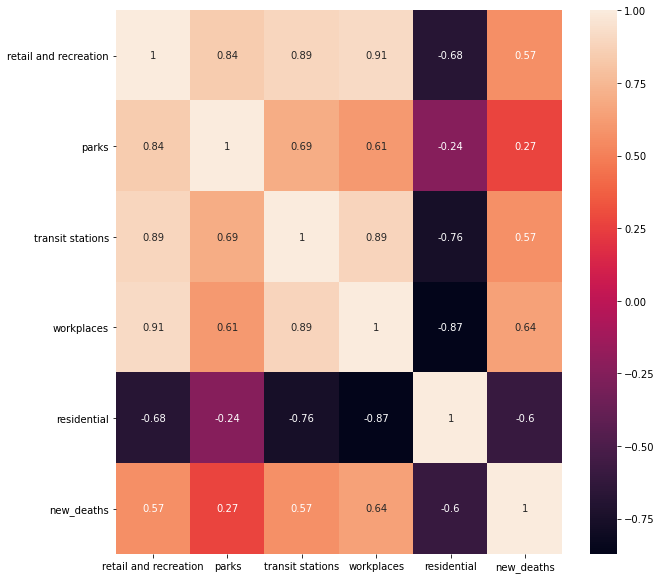

In [ ]:
plt.figure(figsize=(10, 10))
corr = dadosprocessados.corr()
_ = sns.heatmap(corr, annot=True) 

# Modelo de regressão - Rede Neural Perceptron Multicamadas (MPL)

A rede neural utilizada possui uma ou mais camadas ocultas com um número indeterminado de neurônios.Para treinar a rede MLP, o algoritmo comumente utilizado é o de retropropagação (Backpropagation).




In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pickle
X= dadosprocessados.drop('new_deaths', 1) 
y = dadosprocessados['new_deaths'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

regr = MLPRegressor(random_state=1, max_iter=80000).fit(X_train, y_train)
regr.predict(X_test)

meu_arquivo = open('rede_covid_v1.p',  'wb')
pickle.dump(regr, meu_arquivo)
meu_arquivo.close()
round(100*regr.score(X_test, y_test),2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



73.15

# Resultados

In [ ]:
def predicao(dados):
  variaveis = ['retail and recreation','parks','transit stations','workplaces','residential']
  varss = { 
        'retail and recreation':mediamovel2(np.array(-dados['retail and recreation'])/max(dados['retail and recreation']),M),
          'parks':mediamovel2(np.array(-dados['parks'])/max(dados['parks']),M),
          'transit stations':mediamovel2(np.array(-dados['transit stations'])/max(dados['transit stations']),M),
        'workplaces':mediamovel2(np.array(-dados['workplaces'])/max(dados['workplaces']),M),
        'residential':mediamovel2(np.array(-dados['residential'])/max(dados['residential']),M),}
  dadospredicao = pd.DataFrame(data=varss,columns=variaveis)
  predicao = regr.predict(dadospredicao)
  return  predicao
  print(dadospredicao)

In [ ]:
y_real = fortaleza['new_deaths']
y_pred = predicao(fortaleza_mobilidade)
fig = go.Figure()
fig.update_layout(title='accumulated deaths per 100k  inhabitants in Fortaleza',
                   xaxis_title='Date',
                   yaxis_title='accumulated deaths per 100k inhabitants')
fig.add_trace(go.Line(x=fortaleza['date'], y=soma(np.array(mediamovel2(y_real,M))/f), name='Real'))
fig.add_trace(go.Line(x=fortaleza['date'], y=soma(y_pred), name='Estimated')) 
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# Considerações



*   Os dados considerados levam em conta apenas as pessoas que possuem celular, desse modo,  a mobilidade de toda a população acaba não sendo totalmente computada, o que pode acabar gerado divergências em relação as previsões.
*  Fatores como **subnotificação** e **falta de assistência **médica também podem ser consideradas fatores que gerem distorções nas previsões.
* O presente estudo **não** considera ainda o efeito da vacinação.
* A geração de um modelo com uma maior quantidade de cidade pode gerar previsões mais precisas.



In [ ]:
from sklearn.metrics import mean_squared_error
round(mean_squared_error(y_test, regr.predict(X_test)),4)

0.093